In [82]:
import torch
import numpy as np
import os

from ..utils.read_npy import load_npy
def load_npy(file:os.PathLike):
    res = np.load(file)
    return res

ImportError: attempted relative import with no known parent package

In [66]:
data = load_npy(r'../data/pre.npy')
res = np.sum(data > 1e-1)
print(res)

454


In [76]:
res2 = torch.nn.functional.sigmoid(torch.asarray(data))
print(torch.sum(1 - res2 < 0.5).item())
print(torch.unique(res2).__len__())

16384
3367


#### 上述说明了，sigmoid激活后，所有的值都大于0.1，且都在1-0.1之间；浮点精度问题，单调递增函数。

In [63]:
res3 = torch.nn.functional.softmax(torch.asarray(data).reshape(1, -1), dim=1).view(128, -1)
torch.unique(res3).__len__()

6038

In [55]:
def adjust_rate(img, rate):
    return img * rate

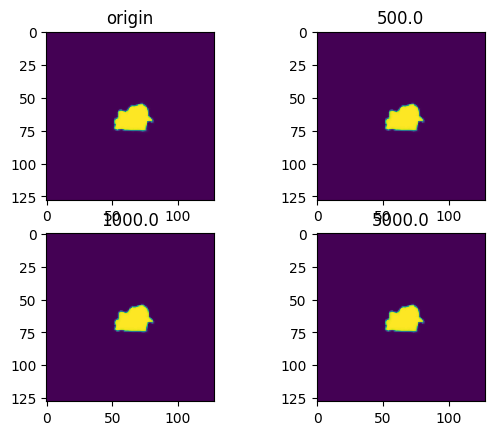

In [65]:
from matplotlib import pyplot as plt

rates = [5*1e2, 1e3, 5*1e3]
plt.figure()
plt.subplot(2,2,1)
plt.imshow(data)
plt.title('origin')
for r in range(len(rates)):
    plt.subplot(2,2,r+2)
    plt.imshow(adjust_rate(res3, rates[r]).detach().numpy())
    plt.title(str(rates[r]))
    print()
plt.show()


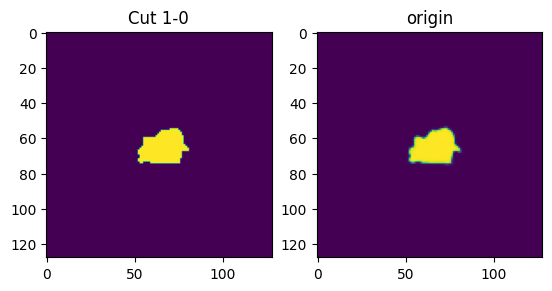

In [81]:
data1 = np.where(data>0.5, 1, 0)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(data1)
plt.title("Cut 1-0")
plt.subplot(1,2,2)
plt.imshow(adjust_rate(res3, 1e3).detach().numpy())
plt.title("origin")
plt.show()